In [334]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline

In [335]:
# use fe1 for ridge & lasso; use fe3 for random forest
train_df = pd.read_csv('train_fe4.csv')
test_df = pd.read_csv('test_fe4.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,BsmtFlag,WoodDeckFlag,PoolFlag,BsmtFinPerc,SalePrice
0,1,10,3,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,5,2003,1,1,12,13,1,196.0,4.0,3.0,2,4.0,3.0,1.0,6.0,1.0,856.0,1,5.0,1,4,0,1710,1.0,0.0,2,1,3,1,4.0,8,7.0,0,0.0,1,2.0,2.0,3.0,2.0,0,61,0,0,0,4,1,0,8,4,1.0,0,0,0.824766,12.247694
1,2,5,3,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,8,1976,1,1,8,8,2,0.0,3.0,3.0,1,4.0,3.0,4.0,5.0,1.0,1262.0,1,5.0,1,4,0,1262,0.0,1.0,2,0,3,1,3.0,6,7.0,1,3.0,1,2.0,2.0,3.0,2.0,298,0,0,0,0,4,1,0,8,4,1.0,1,0,0.774960,12.109011
2,3,10,3,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,5,2002,1,1,12,13,1,162.0,4.0,3.0,2,4.0,3.0,2.0,6.0,1.0,920.0,1,5.0,1,4,0,1786,1.0,0.0,2,1,3,1,4.0,6,7.0,1,3.0,1,2.0,2.0,3.0,2.0,0,42,0,0,0,4,1,0,8,4,1.0,0,0,0.528261,12.317167
3,4,11,3,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,5,1970,1,1,13,15,2,0.0,3.0,3.0,0,3.0,4.0,1.0,5.0,1.0,756.0,1,4.0,1,4,0,1717,1.0,0.0,1,0,3,1,4.0,7,7.0,1,4.0,5,1.0,3.0,3.0,2.0,0,35,272,0,0,4,1,0,8,0,1.0,0,0,0.285714,11.849398
4,5,10,3,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,5,2000,1,1,12,13,1,350.0,4.0,3.0,2,4.0,3.0,3.0,6.0,1.0,1145.0,1,5.0,1,4,0,2198,1.0,0.0,2,1,4,1,4.0,9,7.0,1,3.0,1,2.0,3.0,3.0,2.0,192,84,0,0,0,4,1,0,8,4,1.0,1,0,0.572052,12.429216


In [336]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [337]:
y_train = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis=1)
X_test = test_df.copy()

In [338]:
del train_df, test_df

In [339]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1460, 69)
(1460,)
(1459, 69)


## Train Valildation Split

In [340]:
# Save the 'MiscVal' column
X_test_MiscVal = X_test['MiscVal']

# Now drop the 'MiscVal' column since we won't use it to train our model.
X_train.drop("MiscVal", axis = 1, inplace = True)
X_test.drop("MiscVal", axis = 1, inplace = True)

In [341]:
# train-validation split
from sklearn.model_selection import train_test_split
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [342]:
len(X_train_train)/len(X_val)

4.0

## Ridge Regression

In [93]:
from sklearn import linear_model

Automatically created module for IPython interactive environment


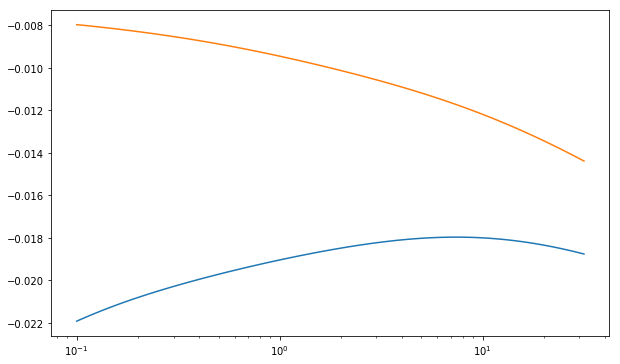

In [94]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = X_train_train, y_train_train

param_range = np.logspace(-1, 1.5, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [96]:
param_range[np.argmax(test_scores_mean)]

7.3907220335257788

In [97]:
rm_best = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])

In [98]:
rm_best.fit(X_train_train, y_train_train)

Ridge(alpha=7.3907220335257788, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [99]:
pred_val = rm_best.predict(X_val)

In [100]:
np.sqrt(np.mean((pred_val - y_val)**2))

0.12066372262433288

In [102]:
rm_best.fit(X_train, y_train)

Ridge(alpha=7.3907220335257788, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [103]:
pred_test = rm_best.predict(X_test)

pred_test_final = pd.DataFrame({'SalePrice': np.exp(pred_test) + X_test_MiscVal})

pred_test_final = pred_test_final.assign(Id = test_ID)

pred_test_final.to_csv('rr2_yq.csv',index=False)

## Lasso Regression

Automatically created module for IPython interactive environment


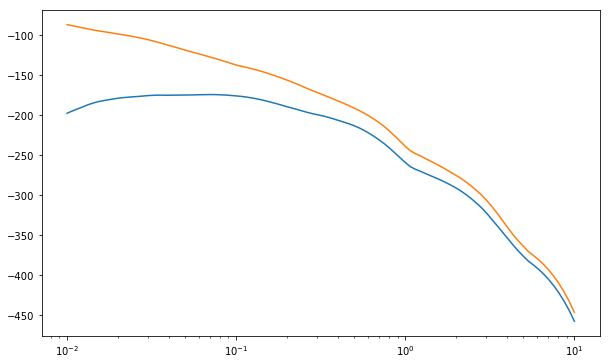

In [202]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = X_train_train, y_train_train*100

param_range = np.logspace(-2, 1, 100)
train_scores, test_scores = validation_curve(
    linear_model.Lasso(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [203]:
param_range[np.argmax(test_scores_mean)]

0.070548023107186456

In [204]:
lm_best = linear_model.Lasso(alpha = param_range[np.argmax(test_scores_mean)])

In [205]:
lm_best.fit(X_train_train, y_train_train*100)

Lasso(alpha=0.070548023107186456, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [206]:
lm_best.coef_

array([  0.        ,   7.25981945,   5.89187671,   3.10544471,
         0.08415836,   0.        ,   1.46960993,  -0.79141202,
         1.66112864,  -0.10870268,   2.03562812,   0.58874111,
        -0.        ,   0.        ,   1.30602108,  -1.14459216,
        38.7166892 ,   2.44599004,   0.        ,   3.27038544,
         2.2857907 ,  -0.26882933,  -2.29602547,   2.67639862,
         0.75501239,   3.30064008,   0.82967404,   0.71724474,
         0.32585818,   5.33937398,  -0.        ,   1.96368176,
         0.20202346,   0.1785686 ,  -0.05927298,   0.56401273,
         0.9732695 ,  -0.        ,  -0.        ,  -0.        ,
         6.06708175,   0.        ,  -2.32833665,  -0.        ,
        -0.        ,   3.30500697,  -0.84056209,  -0.        ,
         0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         4.27866729,   0.        ,   2.56103925,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [207]:
pred_val = lm_best.predict(X_val)

In [208]:
np.sqrt(np.mean((pred_val/100 - y_val)**2))

0.12075029845852028

In [209]:
lm_best.fit(X_train, y_train*100)

Lasso(alpha=0.070548023107186456, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [188]:
pred_test = lm_best.predict(X_test)

In [189]:
pred_test_final = pd.DataFrame({'SalePrice': np.exp(pred_test/100) + X_test_MiscVal})

In [190]:
pred_test_final = pred_test_final.assign(Id = test_ID)

In [191]:
pred_test_final.to_csv('lr1_yq.csv',index=False)

## Random Forest

In [363]:
from sklearn import model_selection

In [344]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor(n_estimators=30)

In [347]:
grid_para_forest = [{
#     "n_estimators": [25, 50, 100],
    "max_features": np.linspace(start=1, stop=68, num=14, dtype=int),
    "min_samples_leaf": range(1, 6),
    "min_samples_split": np.linspace(start=2, stop=20, num=10, dtype=int),
    "random_state": [0]}]
grid_search_forest = model_selection.GridSearchCV(randomForest, grid_para_forest, 
                                                  scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train_train, y_train_train)

CPU times: user 6.68 s, sys: 380 ms, total: 7.06 s
Wall time: 2min 41s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_features': array([ 1,  6, 11, 16, 21, 26, 31, 37, 42, 47, 52, 57, 62, 68]), 'min_samples_leaf': range(1, 6), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]), 'random_state': [0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [348]:
grid_search_forest.best_params_

{'max_features': 26,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'random_state': 0}

In [222]:
from sklearn import metrics

In [349]:
## The overall RMSE on the validation set:
np.sqrt(metrics.mean_squared_error(y_val, grid_search_forest.predict(X_val)))

0.14099954664094697

In [350]:
rf_best = ensemble.RandomForestRegressor(n_estimators=500, max_features=26, min_samples_leaf=1, min_samples_split=6)

rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=26, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [351]:
pred_test = rf_best.predict(X_test)
pred_test_final = pd.DataFrame({'SalePrice': np.exp(pred_test) + X_test_MiscVal})
pred_test_final = pred_test_final.assign(Id = test_ID)
pred_test_final.to_csv('rf3_yq.csv',index=False)

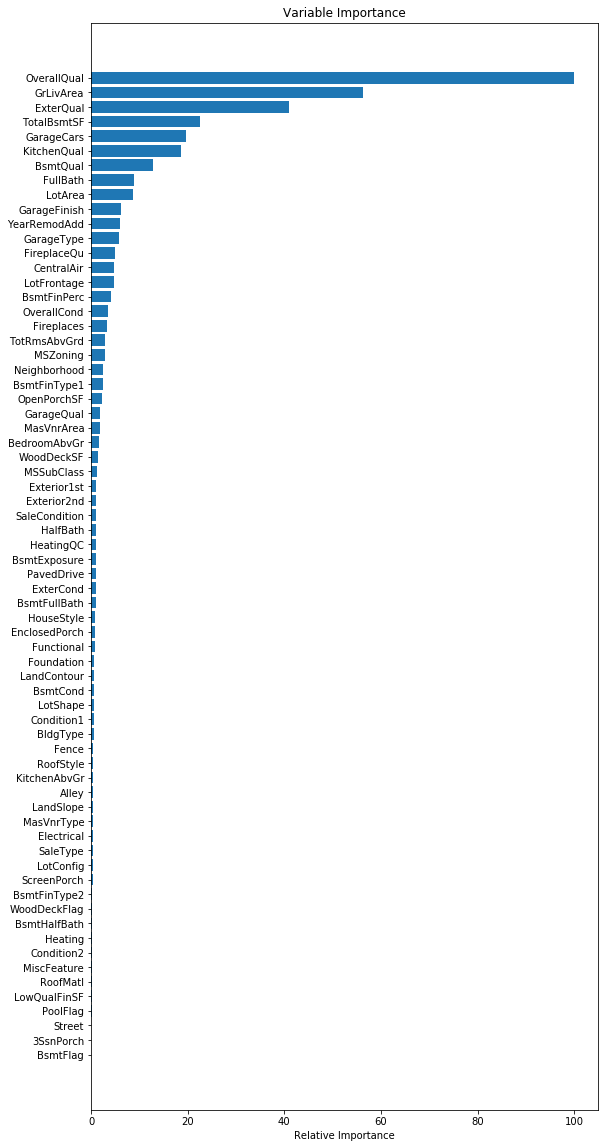

In [362]:
feature_importance = rf_best.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Gradient Boosting

In [386]:
from sklearn import ensemble
gradientBoosting = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01)

In [387]:
grid_para_forest = [{
    "criterion": ['friedman_mse', 'mse'],
    "max_depth": [4],
    "max_features": [4, 8, 16],
    "min_samples_split": np.linspace(start=2, stop=20, num=10, dtype=int),
    "random_state": [0]}]
grid_search_forest = model_selection.GridSearchCV(gradientBoosting, grid_para_forest, 
                                                  scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
%time grid_search_forest.fit(X_train_train, y_train_train)

CPU times: user 3.35 s, sys: 220 ms, total: 3.57 s
Wall time: 3min 24s


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'criterion': ['friedman_mse', 'mse'], 'max_depth': [4], 'max_features': [4, 8, 16], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]), 'random_state': [0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [388]:
grid_search_forest.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 16,
 'min_samples_split': 12,
 'random_state': 0}

In [222]:
from sklearn import metrics

In [389]:
## The overall RMSE on the validation set:
np.sqrt(metrics.mean_squared_error(y_val, grid_search_forest.predict(X_val)))

0.12646015338956115

In [392]:
gb_best = ensemble.GradientBoostingRegressor(n_estimators=10000, max_depth=4, max_features=16,
                                             learning_rate=0.01, min_samples_split=12)

gb_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=16,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=12, min_weight_fraction_leaf=0.0,
             n_estimators=10000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [393]:
pred_test = gb_best.predict(X_test)
pred_test_final = pd.DataFrame({'SalePrice': np.exp(pred_test) + X_test_MiscVal})
pred_test_final = pred_test_final.assign(Id = test_ID)
pred_test_final.to_csv('gb1_yq.csv',index=False)

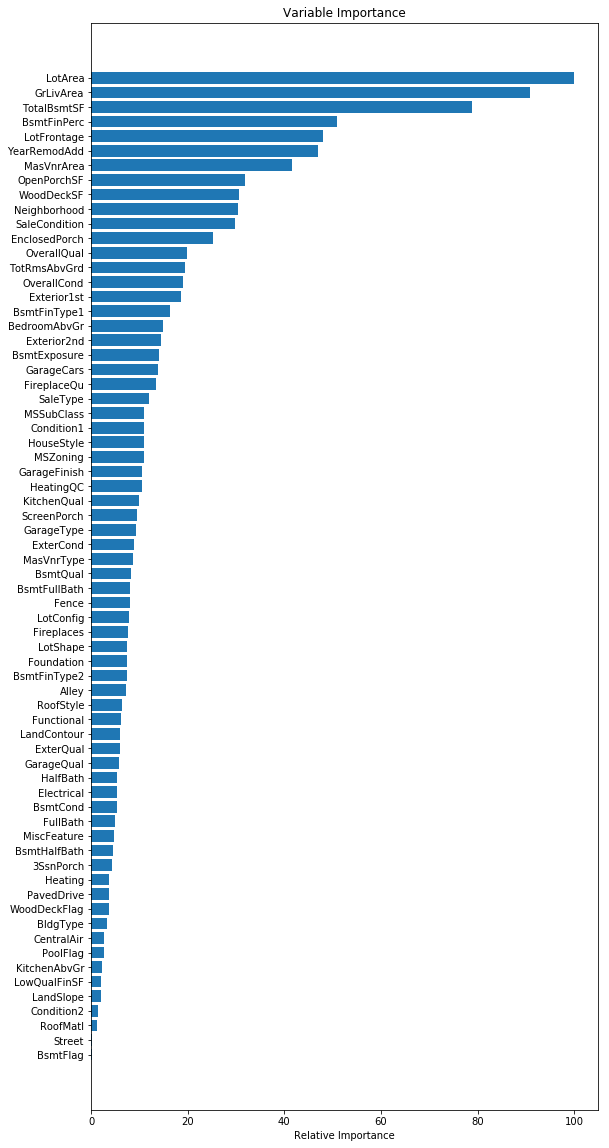

In [394]:
feature_importance = gb_best.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()